In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas_datareader as pdr
import matplotlib.ticker as mticker
import numpy as np
import itertools

# Speed of Money Transactions and Inflation 

## Executive Summary

The data is from the *Survey of Consumer Payment Choice* (SCPC) and the *Diary of Consumer Payment Choice* (DCPC).

* Extensive-margin measure: SCPC measures the frequency of use of payment instruments (i.e., how often a means of payment such as cash or credit card is used in consumer expenditures).
* Intensive-margin measure: DCPC measures the dollar value of expenditure, conditioning on each payment instrument.

DCPC is much shorter than SCPC:
* SCPC is available from 2008.
* DCPC is available from 2015.

SCPC collects information on *nine* types of payment instruments:
1. Cash
2. Check
3. Money Order
4. Debit Card
5. Credit Card
6. Prepaid card
7. Bank Account number payment
8. Online banking bill payment
9. Direct from income.

In this notebook, we use the frequency measure (SCPC) and the expenditure-value measure (DCPC) for five cases:
1. *cash*
2. (1) + *check* + *money order* + *debit card*
3. (2) + *credit card* + *prepaid card*
4. (3) + *banking account number payment* + *online banking bill payment*
5. (4) - *credit card*

**Note**: The addition (``+``) and subtraction (``-``) operators above denote data-setwise inclusion and exclusion, respectively.


# Transactions and Inflation

In [2]:
dft = pd.read_excel('../data/SCPC-DCPC/data_spcp-dcpc_2022-02-08.xlsx', "bxM1")
dft.columns = ['Year', 
               'Inflation', 
               '(1) bx/M', 
               '(2) bx/M',
               '(3) bx/M',
               '(4) bx/M',
               '(5) bx/M',
               'M1',
               ]

In [3]:
# Quick peek into table
dft

,Year,Inflation,(1) bx/M,(2) bx/M,(3) bx/M,(4) bx/M,(5) bx/M,M1
0,2015,0.118627,49.127138,388.733011,552.611003,1247.817425,520.669155,7.34564
1,2016,1.261583,50.625752,250.602029,392.892737,878.067131,340.991609,7.50179
2,2017,2.130110,48.931152,273.418045,410.967533,948.305262,407.540571,8.47744
3,2018,2.442583,93.468851,566.244383,809.026305,1879.206218,747.578841,4.44014
4,2019,1.812210,50.715130,375.316996,549.349940,1275.662587,987.050299,4.45357


# Select series

In [4]:
# Drop series ['Year', 'Inflation', 'M1'] from column names
speed_measures = dft.columns[~np.isin(dft.columns, ['Year', 'Inflation', 'M1'])]

In [5]:
# speed_measures_subset = speed_measures.copy()
speed_measures_subset = speed_measures[
                            ~np.isin(speed_measures, ['(3) bx/M', '(4) bx/M'])
                        ]

## Visualizing all series (1) to (5)

* Log-scale

* Plot all together

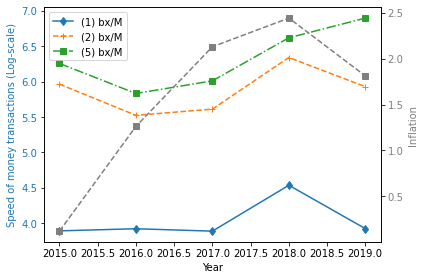

In [6]:
fig, ax1 = plt.subplots()

# Styles
marker = itertools.cycle(('d', '+', 's', 'o', '*')) 
line = itertools.cycle(('-', '--',  '-.', ':', '-')) 
# Left y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Speed of money transactions (Log-scale)', color=color)
for series in speed_measures_subset:
    ax1.plot(dft['Year'], np.log(dft[series]), 
                label=series,
                marker=next(marker), 
                linestyle=next(line),
            )
# ax1.plot(dft['Year'], np.log(dft['(1) bx/M']), 
#          '-o', color=color, label="(1)"
#          )
# ax1.plot(dft['Year'], np.log(dft['(2) bx/M']), 
#          '-+', color="red", label="(2)"
#          )
# ax1.plot(dft['Year'], np.log(dft['(3) bx/M']), 
#          '-x', color="orange", label="(3)"
#          )
# ax1.plot(dft['Year'], np.log(dft['(4) bx/M']), 
#          '-.s', color="green", label="(4)"
#          )
# ax1.plot(dft['Year'], np.log(dft['(5) bx/M']), 
#          '-d', color="magenta", label="(5)"
#          )
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()

# Right y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:gray'
ax2.set_ylabel('Inflation', color=color)  # we already handled the x-label with ax1
ax2.plot(dft['Year'], dft['Inflation'], '--s', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Visualizing all series (1) to (5), or just subset

* Level scale

* Plot separately

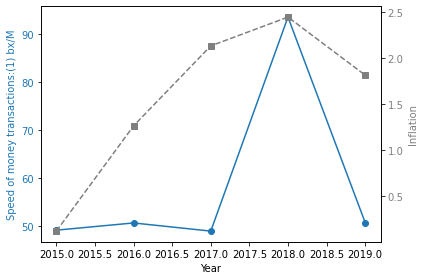

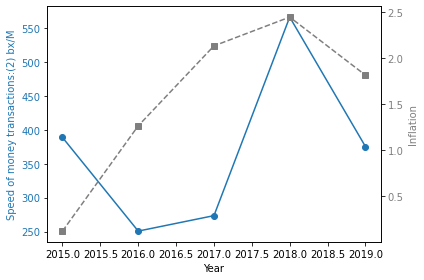

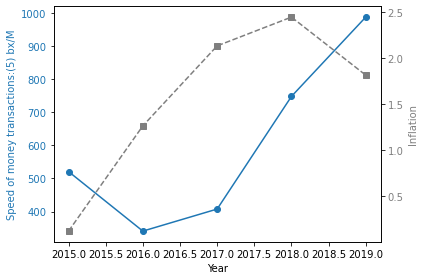

In [7]:
for series in speed_measures_subset:
    fig, ax1 = plt.subplots()

    # Left y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Speed of money transactions:' + series, color=color)
    ax1.plot(dft['Year'], dft[series], '-o', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Right y-axis
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:gray'
    ax2.set_ylabel('Inflation', color=color)  # we already handled the x-label with ax1
    ax2.plot(dft['Year'], dft['Inflation'], '--s', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

## Visualizing series (1), (2) and (5)

* Level scale

* Correlation scatterplot, regression fit and marginal data distributions

<Figure size 432x288 with 0 Axes>

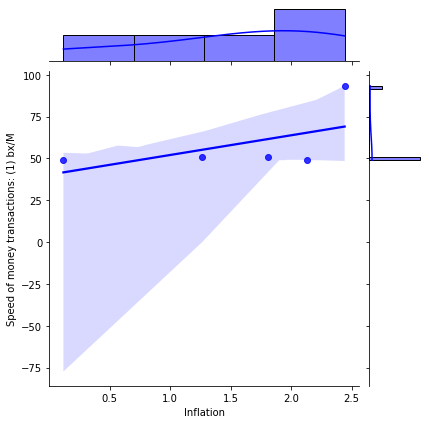

<Figure size 432x288 with 0 Axes>

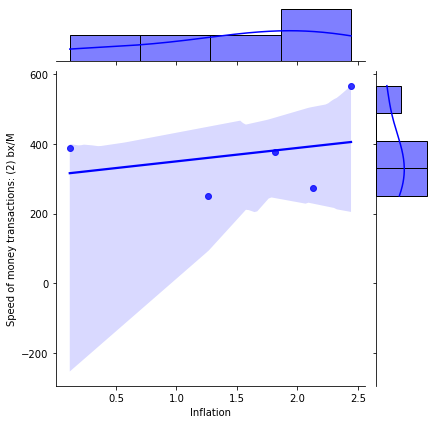

<Figure size 432x288 with 0 Axes>

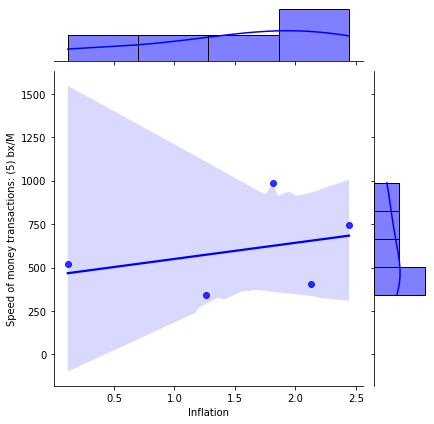

In [8]:
for series in speed_measures_subset:
    plt.figure()
    g = sns.jointplot(x="Inflation", y=series, 
                    data=dft, 
                    kind="reg",
                    color ="blue")
    g.ax_joint.set_xlabel('Inflation', fontweight='normal')
    g.ax_joint.set_ylabel('Speed of money transactions: ' + series, 
                          fontweight='normal')
    plt.show()

## Visualizing average money expenditures

* In the model this is $\int b(m)x(m)\text{d}G(m)$.

In [15]:
df_bx = pd.read_excel('../data/SCPC-DCPC/data_spcp-dcpc_2022-02-08.xlsx', "bx")
df_bx.columns = ['Year', 
               'Inflation', 
               '(1) bx', 
               '(2) bx',
               '(3) bx',
               '(4) bx',
               '(5) bx',
               ]

<Figure size 432x288 with 0 Axes>

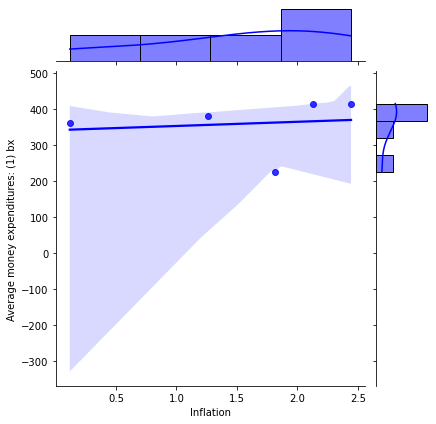

<Figure size 432x288 with 0 Axes>

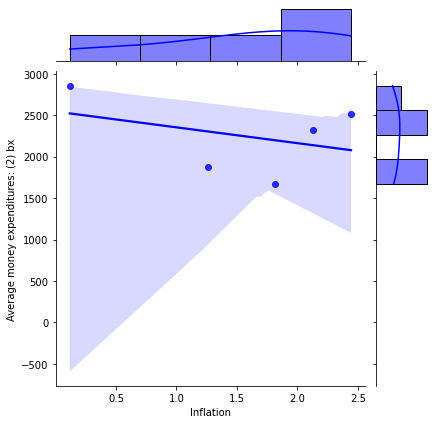

<Figure size 432x288 with 0 Axes>

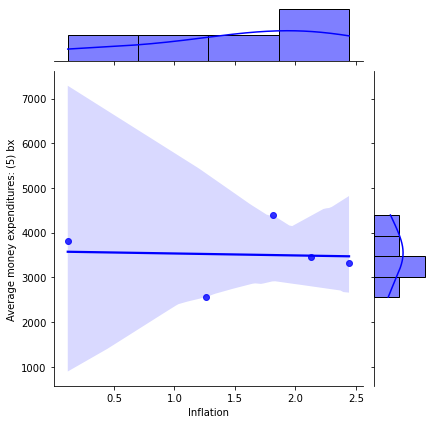

In [17]:
bx_measures = ['(1) bx', '(2) bx', '(5) bx']

for series in bx_measures:
    plt.figure()
    g = sns.jointplot(x="Inflation", y=series, 
                    data=df_bx, 
                    kind="reg",
                    color ="blue")
    g.ax_joint.set_xlabel('Inflation', fontweight='normal')
    g.ax_joint.set_ylabel('Average money expenditures: ' + series, 
                          fontweight='normal')
    plt.show()

## Visualizing the extensive margin

* In the model, this is predicted as (average), $b$, i.e., $\int b(m) \text{d}G(m)$ , where $G$ is the equilibrium probability measure of agent money holdings.

* In the data, we take SCPC's aggregate (average) measure of frequency (counts) of payments using various instruments. 

* To be consistent with the model, we measure SCPC's counterpart of average $b$ as total number of cash payments per total payments using all payment instruments. (Note that in the model, all non-money payments would be associated with non-DM-matched trades.)

In [9]:
binf = pd.read_excel('../data/SCPC-DCPC/data_spcp-dcpc_2022-02-08.xlsx', "scpc")

In [10]:
binf

,year,mean_(1),mean_(2),mean_(3),mean_(4),mean_(5),inflation
0,2008,18.47011,55.46656,78.26326,164.66000,32.75320,3.839100
1,2009,15.91533,45.14735,61.61005,130.51610,53.44911,-0.355546
2,2010,20.30879,51.26291,68.70975,144.81510,52.22668,1.640043
3,2011,19.17594,48.39925,66.60149,140.54520,52.54088,3.156842
4,2012,19.17734,48.41994,67.31353,141.81920,53.15940,2.069337
5,2013,17.49496,44.80552,61.25754,128.99800,59.34117,1.464833
6,2014,18.43376,51.01337,70.48296,148.42810,51.91319,1.622223
7,2015,18.25160,45.47102,63.45092,133.68140,56.29265,0.118627
8,2016,17.65454,44.86982,61.71308,129.98040,56.32988,1.261583
9,2017,18.40076,44.92802,63.13042,132.24730,59.08030,2.130110


In [11]:
# SCPC's counterpart to model's average extensive margin ("b")
# (1) is freq of cash transactions
# (4) is "all", i.e.,
#               cash + check + money order + debit card 
#               + credit card + prepaid card 
#               + bank-account-number payment 
#               + online-banking-bill payment
binf["b"] = binf["mean_(1)"]/binf["mean_(4)"]

<Figure size 432x288 with 0 Axes>

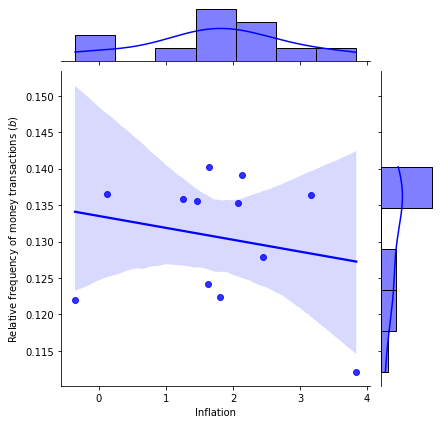

In [18]:
plt.figure()
g = sns.jointplot(x="inflation", y="b", 
                data=binf, 
                kind="reg",
                color ="blue")
g.ax_joint.set_xlabel('Inflation', fontweight='normal')
g.ax_joint.set_ylabel(r'Relative frequency of money transactions ($b$)', 
                      fontweight='normal')
plt.show()